In [2]:
import cv2
import numpy as np
import sys

In [4]:
img  = cv2.imread('./fig3/lenna.bmp')

if img is None:
    print('read err')
    sys.exit()

cv2.namedWindow('image',cv2.WINDOW_NORMAL)
cv2.imshow('image',img)

cv2.waitKey()
cv2.destroyAllWindows()

In [5]:
import glob

In [6]:
img_lst = glob.glob('./fig/my_images/*.*')

cv2.namedWindow('scene',cv2.WINDOW_NORMAL)
cv2.setWindowProperty('scene',cv2.WND_PROP_FULLSCREEN,cv2.WINDOW_FULLSCREEN)

idx=0

while True:
    img=cv2.imread(img_lst[idx])
    cv2.imshow('scene',img)
    
    if cv2.waitKey(100)==27:
        break
    
    idx+=1
    
    if idx>=len(img_lst):
        idx=0
cv2.destroyAllWindows()

In [2]:
cap = cv2.VideoCapture(0)

if cap.isOpened()==False:
    print('open err')
    sys.exit()

w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))
fourcc = cv2.VideoWriter_fourcc(*'DIVX')

out=cv2.VideoWriter('out.avi',fourcc,fps,(w,h))
    
while True:
    ret,frame = cap.read()
    
    if not ret:
        print('read err')
        break
    
    edge=cv2.Canny(frame,50,150)
    flip=cv2.flip(frame,1)
    cv2.imshow('image',frame)
    cv2.imshow('edge',edge)
    cv2.imshow('flip',flip)
    out.write(flip)
    if cv2.waitKey(20)==27:
        break
 
out.release()
cap.release()
cv2.destroyAllWindows()

In [8]:
def cm(evt,x,y,flags,param):
    global ox,oy
    if evt==cv2.EVENT_LBUTTONDOWN:
        ox,oy=x,y
    elif evt==cv2.EVENT_MOUSEMOVE:
        if flags==cv2.EVENT_FLAG_LBUTTON:
            cv2.line(img,(ox,oy),(x,y),(255,255,0),10,cv2.LINE_AA)
            cv2.imshow('image',img)
            ox,oy=x,y
            
img = np.ones((600,1200,3),np.uint8)*255

cv2.imshow('image',img)
cv2.setMouseCallback('image',cm,img)

cv2.waitKey()
cv2.destroyAllWindows()

In [4]:
def ct(pos):
    img[:]=np.round(img1*(pos/255),0).astype(np.uint8)
    cv2.imshow('image',img)

img = cv2.imread('./fig3/lenna.bmp',0)
img1=img.copy()

cv2.imshow('image',img)
cv2.createTrackbar('lv','image',0,255,ct)

cv2.waitKey()
cv2.destroyAllWindows()

In [5]:
src1 = cv2.imread('./fig3/lenna256.bmp',0)
src2=np.zeros((256,256),np.uint8)
cv2.circle(src2,(128,128),100,200,-1)
cv2.circle(src2,(128,128),50,50,-1)

dst1 = cv2.add(src1,src2)
dst2 = cv2.subtract(src1,src2)
dst3 = cv2.addWeighted(src1,0.5,src2,0.5,0)
dst4 = cv2.absdiff(src1,src2)

cv2.imshow('src1',src1)
cv2.imshow('src2',src2)
cv2.imshow('dst1',dst1)
cv2.imshow('dst2',dst2)
cv2.imshow('dst3',dst3)
cv2.imshow('dst4',dst4)

cv2.waitKey()
cv2.destroyAllWindows()

In [6]:
img = cv2.imread('./fig3/flowers.jpg')
b,g,r=cv2.split(img)

cv2.imshow('img',img)
cv2.imshow('b',b)
cv2.imshow('g',g)
cv2.imshow('r',r)

cv2.waitKey()
cv2.destroyAllWindows()

In [3]:
import matplotlib.pyplot as plt

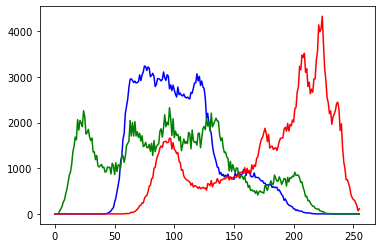

In [7]:
img = cv2.imread('./fig3/lenna.bmp',1)

# calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]]) -> hist
hist_b = cv2.calcHist([img],[0],None,[256],[0,256])
hist_g = cv2.calcHist([img],[1],None,[256],[0,256])
hist_r = cv2.calcHist([img],[2],None,[256],[0,256])

plt.plot(hist_b,color='b')
plt.plot(hist_g,color='g')
plt.plot(hist_r,color='r')
plt.show()

cv2.imshow('image',img)

cv2.waitKey()
cv2.destroyAllWindows()

In [10]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import cv2


def getGrayHistImage(hist):
    imgHist = np.full((200, 256), 255, dtype=np.uint8)

    histMax = np.max(hist)
    for x in range(256):
        pt1 = (x, 200)
        pt2 = (x, 200 - int(hist[x, 0] * 200 / histMax))
        cv2.line(imgHist, pt1, pt2, 0)

    return imgHist


src = cv2.imread('./fig3/lenna.bmp', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

hist = cv2.calcHist([src], [0], None, [256], [0, 256])
histImg = getGrayHistImage(hist)

cv2.imshow('src', src)
cv2.imshow('histImg', histImg)
cv2.waitKey()

cv2.destroyAllWindows()

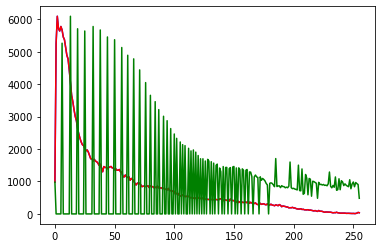

In [52]:
# src=cv2.imread('./fig4/puppy_shrink.png',0)
src=cv2.imread('./fig4/manjang.jpg',cv2.IMREAD_REDUCED_GRAYSCALE_2)


# minMaxLoc(src[, mask]) -> minVal, maxVal, minLoc, maxLoc
minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(src)
# print(minVal,maxVal)

dst_norm = np.clip((src-minVal)*255./(maxVal-minVal),0,255).astype(np.uint8)

# normalize(src, dst[, alpha[, beta[, norm_type[, dtype[, mask]]]]]) -> dst
# dst_norm = cv2.normalize(src,None,0,255,cv2.NORM_MINMAX,-1)
dst_equal = cv2.equalizeHist(src)

hist = cv2.calcHist([src],[0],None,[256],[0,256])
hist_norm = cv2.calcHist([dst_norm],[0],None,[256],[0,256])
hist_equal =cv2.calcHist([dst_equal],[0],None,[256],[0,256])

plt.plot(hist,color='b')
plt.plot(hist_norm,color='r')
plt.plot(hist_equal,color='g')
plt.show()

cv2.imshow('src',src)
cv2.imshow('dst_norm',dst_norm)
cv2.imshow('dst_equal',dst_equal)

cv2.waitKey()
cv2.destroyAllWindows()

In [38]:
src = cv2.imread('./fig4/spring_in_park.jpg',cv2.IMREAD_REDUCED_COLOR_4)
src_hsv = cv2.cvtColor(src,cv2.COLOR_BGR2HSV)

h,s,v = cv2.split(src_hsv)

# normalize(src, dst[, alpha[, beta[, norm_type[, dtype[, mask]]]]]) -> dst
v_norm = cv2.normalize(v,None,0,255,cv2.NORM_MINMAX,-1)
v_equal = cv2.equalizeHist(v)

dst_norm = cv2.merge((h,s,v_norm))
dst_norm = cv2.cvtColor(dst_norm,cv2.COLOR_HSV2BGR)
dst_equal = cv2.merge((h,s,v_equal))
dst_equal = cv2.cvtColor(dst_equal,cv2.COLOR_HSV2BGR)

cv2.imshow('src',src)
cv2.imshow('h',h)
cv2.imshow('s',s)
cv2.imshow('v',v)
cv2.imshow('dn',dst_norm)
cv2.imshow('de',dst_equal)

cv2.waitKey()
cv2.destroyAllWindows()

In [142]:
src = cv2.imread('./fig4/palette.png',cv2.IMREAD_REDUCED_COLOR_2)
# src = cv2.imread('./fig4/palette_dark.png',cv2.IMREAD_REDUCED_COLOR_2)
src_hsv = cv2.cvtColor(src,cv2.COLOR_BGR2HSV)

# inRange(src, lowerb, upperb[, dst]) -> dst
dst1 = cv2.inRange(src,(0,100,0),(100,255,100))
dst2 = cv2.inRange(src_hsv,(45,150,0),(75,255,255))

dst = cv2.copyTo(src,dst2)

cv2.imshow('src',src)
cv2.imshow('dst1',dst1)
cv2.imshow('dst2',dst2)
cv2.imshow('dst',dst)

cv2.waitKey()
cv2.destroyAllWindows()

In [129]:
def ct(pos):
    hmin = cv2.getTrackbarPos('h_min','dst')
    hmax = cv2.getTrackbarPos('h_max','dst')
    
    dst = cv2.inRange(src,(hmin,150,0),(hmax,255,255))
    cv2.imshow('dst',dst)
    
src = cv2.imread('./fig4/palette.png',cv2.IMREAD_REDUCED_COLOR_2)

cv2.imshow('src',src)
cv2.namedWindow('dst',cv2.WINDOW_NORMAL)
cv2.createTrackbar('h_min','dst',50,179,ct)
cv2.createTrackbar('h_max','dst',50,179,ct)

cv2.waitKey()
cv2.destroyAllWindows()


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


In [128]:
def ct(pos):
    global mask,src1,src
    hmin = cv2.getTrackbarPos('h_min','src1')
    hmax = cv2.getTrackbarPos('h_max','src1')
    smin = cv2.getTrackbarPos('s_min','src1')
    smax = cv2.getTrackbarPos('s_max','src1')
    vmin = cv2.getTrackbarPos('v_min','src1')
    vmax = cv2.getTrackbarPos('v_max','src1')
    
#     mask = cv2.inRange(src,(hmin,smin,vmin),(hmax,smax,vmax))
#     mask = cv2.inRange(src,(hmin,150,0),(hmax,255,255))
    cv2.copyTo(src,cv2.inRange(src,((hmin,smin,vmin),(hmax,smax,vmax)),src1[0:186,0:320]))
    cv2.imshow('src1',src1)
    
src1 = cv2.imread('./fig4/autumn.jpg',cv2.IMREAD_REDUCED_COLOR_8)
src = cv2.imread('./fig4/chromakey.png',cv2.IMREAD_REDUCED_COLOR_4)

# cv2.namedWindow('src',cv2.WINDOW_NORMAL)
cv2.imshow('src',src)
# cv2.imshow('src1',src1)

cv2.namedWindow('src1',cv2.WINDOW_NORMAL)
cv2.createTrackbar('h_min','src1',0,179,ct)
cv2.createTrackbar('h_max','src1',0,179,ct)
cv2.createTrackbar('s_min','src1',0,255,ct)
cv2.createTrackbar('s_max','src1',0,255,ct)
cv2.createTrackbar('v_min','src1',0,255,ct)
cv2.createTrackbar('v_max','src1',0,255,ct)

cv2.waitKey()
cv2.destroyAllWindows()
print(src.shape,src1.shape,mask.shape)

error: OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'inRange'
> Overload resolution failed:
>  - lowerb is not a numerical tuple
>  - Expected Ptr<cv::UMat> for argument 'lowerb'


error: OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'inRange'
> Overload resolution failed:
>  - lowerb is not a numerical tuple
>  - Expected Ptr<cv::UMat> for argument 'lowerb'


error: OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'inRange'
> Overload resolution failed:
>  - lowerb is not a numerical tuple
>  - Expected Ptr<cv::UMat> for argument 'lowerb'


error: OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'inRange'
> Overload resolution failed:
>  - lowerb is not a numerical tuple
>  - Expected Ptr<cv::UMat> for argument 'lowerb'


error: OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'inRange'
> Overload resolution failed:
>  - lowerb is not a numerical tuple
>  - Expected Ptr<cv::UMat> for argument 'lowerb'


error: OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'inRange'
> Overload resolution failed:
>  - lowerb is not a numerical tuple
>  - Expected Ptr<cv::UMat> for argument 'lowerb'


error: OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'inRange'
> Overload resolution failed:
>  - lowerb is not a numerical tuple
>  - Expected Ptr<cv::UMat> for argument 'lowerb'


error: OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'inRange'
> Overload resolution failed:
>  - lowerb is not a numerical tuple
>  - Expected Ptr<cv::UMat> for argument 'lowerb'


error: OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'inRange'
> Overload resolution failed:
>  - lowerb is not a numerical tuple
>  - Expected Ptr<cv::UMat> for argument 'lowerb'


error: OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'inRange'
> Overload resolution failed:
>  - lowerb is not a numerical tuple
>  - Expected Ptr<cv::UMat> for argument 'lowerb'


error: OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'inRange'
> Overload resolution failed:
>  - lowerb is not a numerical tuple
>  - Expected Ptr<cv::UMat> for argument 'lowerb'


error: OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'inRange'
> Overload resolution failed:
>  - lowerb is not a numerical tuple
>  - Expected Ptr<cv::UMat> for argument 'lowerb'


error: OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'inRange'
> Overload resolution failed:
>  - lowerb is not a numerical tuple
>  - Expected Ptr<cv::UMat> for argument 'lowerb'


error: OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'inRange'
> Overload resolution failed:
>  - lowerb is not a numerical tuple
>  - Expected Ptr<cv::UMat> for argument 'lowerb'


(186, 320, 3) (378, 504, 3) (186, 320)


In [5]:
def ct(pos):
    global src1,src,dst,src1_
    hmin = cv2.getTrackbarPos('h_min','dst')
    hmax = cv2.getTrackbarPos('h_max','dst')
    smin = cv2.getTrackbarPos('s_min','dst')
    smax = cv2.getTrackbarPos('s_max','dst')
    vmin = cv2.getTrackbarPos('v_min','dst')
    vmax = cv2.getTrackbarPos('v_max','dst')
    dst = cv2.inRange(src,(hmin,smin,vmin),(hmax,smax,vmax))
    dst=255-dst
    cv2.imshow('dst',dst)
#     src1 = src1_
    src1 = cv2.imread('./fig4/autumn.jpg',cv2.IMREAD_REDUCED_COLOR_4)
    cv2.copyTo(src[20:370,20:620],dst[20:370,20:620],src1[100:450,250:850])
    cv2.imshow('src1',src1)
    
src1 = cv2.imread('./fig4/autumn.jpg',cv2.IMREAD_REDUCED_COLOR_4)
src1_ = src1.copy()
src = cv2.imread('./fig4/chromakey.png',cv2.IMREAD_REDUCED_COLOR_2)

# cv2.namedWindow('src',cv2.WINDOW_NORMAL)
cv2.imshow('src',src)
cv2.imshow('src1',src1)

cv2.namedWindow('dst',cv2.WINDOW_NORMAL)
cv2.createTrackbar('h_min','dst',0,179,ct)
cv2.createTrackbar('h_max','dst',0,179,ct)
cv2.createTrackbar('s_min','dst',0,255,ct)
cv2.createTrackbar('s_max','dst',0,255,ct)
cv2.createTrackbar('v_min','dst',0,255,ct)
cv2.createTrackbar('v_max','dst',0,255,ct)
# cv2.imshow('src1_',src1_)
cv2.waitKey()
cv2.destroyAllWindows()
print(src1.shape,src.shape)

(756, 1008, 3) (373, 640, 3)
